# Assignment 6: Hard Margin SMO

> Joshua Shell

Write your own implementation of the SMO algorithm for hard margin SVM, according to its description (below).



## **Hard Margin SMO**

1. Initialize $\alpha$ = { $\alpha_ 1$ ,..., $\alpha_l$ } **randomly, subject to the constraint:** 
> $ \sum_{i=1}^{l} y_i α_i = 0 $ \
> Set b = 0.
2. Calculate the weight vector  
> $w = \sum_{i=1}^{l} α_i y_i x_i$
3. Calculate KKT conditions:
> $KKT(i) = α_i${$y_i(w ·xi + b) −1$}; for i = 1,...,l \
> $E(i) = \sum_{j=1}^l α_j y_j K_{ji} −y_i$; for i = 1,...,l 
4. Pick $x_1,x_2$: 
> (a) Let $i_1 = arg\ max_{i=1,...,l}\ KKT(i)$. \
> (b) Pick $x_1 = x_{i_1}$. \
> (c) Calculate $e(i) = E(1)−E(i) = \sum_{j=1}^{l} α_j y_j(K_{j1}−K_{ji})+y_i −y_1$
> *Note: $K_{ij} = K(x_i,x_j ) = x_i ·x_j$ when the data set is
linearly separable. Here · means the dot product.* \
> (d) Let $i_2 = arg\ max_i\ e(i)$. \
> (e) Pick $x_2 = x_{i_2}$. \
> (f) Calculate $k = K_{11} + K_{22} −2K_{12}$
5. Update $α_2$: 
> $α_2^{new} = α_2^{old} + {y_2 e(2)}/k$
6. Update α1:
> $α_1^{new} = α_1^{old} + y_1 y_2 (α_2^{old} − α_2^{new} )$
7. For i = 1,...,l, if $α_i < \epsilon, α_i ← 0$;
8. Select $α_i > 0$, calculate b (from KKT conditions)
9. Test for classification;
10. Repeat from Step 2 until classified.


**NOTE** \
In the above, you may find it easier not to rename $i_1$ and $i_2$ as 1 and
2 respectively. In that case, you will use everywhere $i_1$ and $i_2$. That
means \
$y_1 →y_{i_1}; y_2 →y_{i_2}$; \
$α_1 →α_{i_1}; α_2 →α_{i_2}$; \
$K_{12} →K_{i_1i_2}; K_{11} →K_{i_1i_1}; K_{22} →K_{i_2i_2};$ \
$E(1) →E(i_1)$ \
$e(i) = E(i_1) −E(i); i = 1,...,l$ \

# 0. Initialization

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pandas as pd 
import random
import math
from pprint import pprint
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import warnings

#suppress warnings
warnings.filterwarnings('ignore')

### Data Loading:


In [ ]:
dataset = pd.read_csv('/content/SMO_dataset.txt', delimiter=r"\s+", header=None, low_memory=False)
dataset.head(5)

,0,1,2
0,243,3,-1
1,116,165,1
2,198,127,-1
3,184,234,1
4,165,231,1


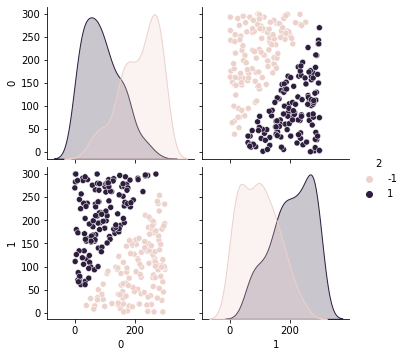

In [ ]:
import seaborn as sns
sns.pairplot(dataset,hue=2)
plt.show()

In [ ]:
def K(xi,xj):
  return xi.dot(xj.T)

def accuracy(pred, original):
  pred[pred < 0] = -1
  pred[pred >= 0] = 1
  return np.mean(pred == original)

def plotFunc(gs,title,xlabel=None,ylabel=None,xlim=None,ylim=None):
  ax = fig.add_subplot(gs)
  ax.set_title(title)
  ax.set_xlabel(xlabel)
  ax.set_ylabel(ylabel)
  #ax.set_xlim(xlim)
  #ax.set_ylim(ylim)
  return ax


In [ ]:
# Format our dataset
x = dataset.drop(columns=2)
x = (x-x.mean())/x.std()
y = dataset[2]

x = np.array(x)
x = np.append(np.ones((len(x),1)), x, axis=1)
y = np.array(y)

# Divide data into train/test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

Final weights
 [  0.   -60.74  61.61]
Accuracy:  100.0 %


<IPython.core.display.Javascript object>

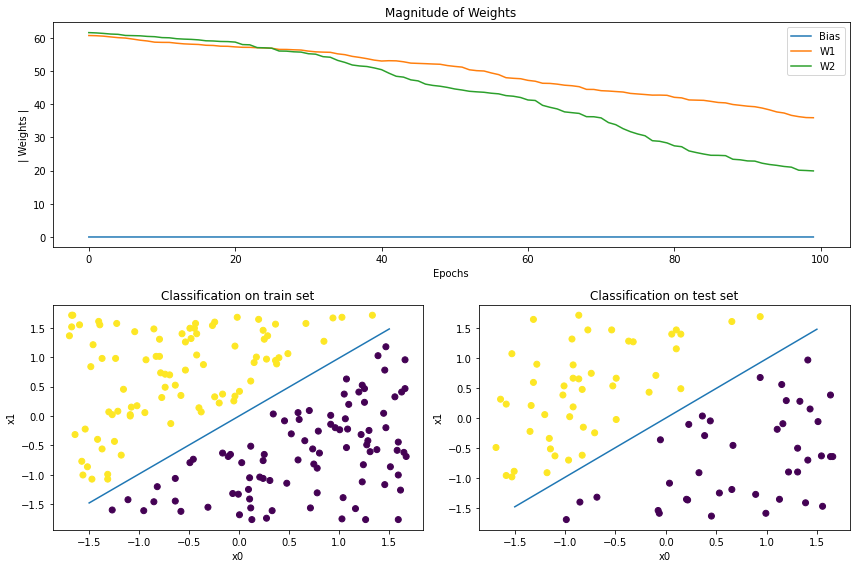

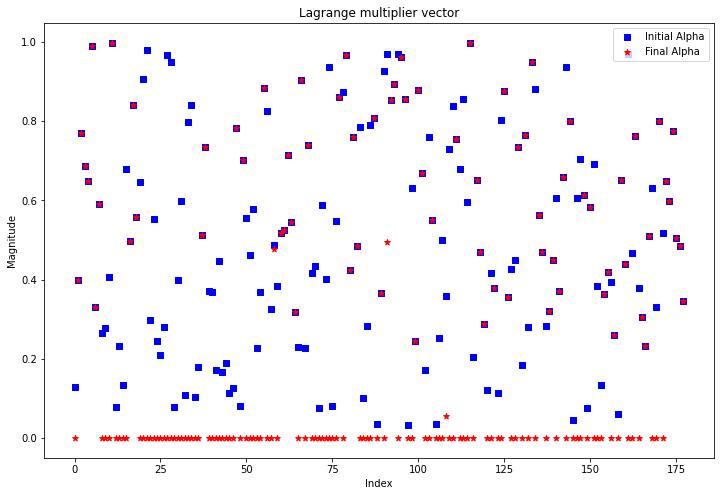

In [ ]:
# Reference 1: http://pages.cs.wisc.edu/~dpage/cs760/SMOlecture.pdf

# Final answer
class smo():
  epsilon = 1e-3
  weights = []
  allW = []
  b = 0
  Lower_Constraint = 0.05
  Upper_Constraint = 1
  alphaTest = []


  def __init__(self, epsilon):
    self.epsilon = epsilon

  def train(self, x, y, epochs, printlabels):
    #Initialize alphas
    # alpha = np.ones(len(y)) * self.Upper_Constraint
    alpha = np.random.uniform(self.Lower_Constraint, self.Upper_Constraint, len(y))
    alpha -= np.sign(alpha*y) * np.mean(alpha*y)
    self.alphaTest.append(np.copy(alpha))
    pre_e = 0

    # m = np.zeros(alpha.size, dtype=bool)
    # m[alpha == 0] = True
    # alpha = np.ma.array(alpha, mask=m)

    if printlabels:
      print('Are any values in alpha negative? ', 'yes' if np.any(alpha<0) else 'no')

    self.weights = x.T.dot(alpha * y)
    
    #Repeat until epochs reached or delta(error) < epsilon
    for Iteration in range(epochs):

      # 2. Calculate Weight
      weights = x.T.dot(alpha * y)
      self.allW.append(weights)

      # 3. Calculate KKT
      # KKT = alpha * (y * (K(self.weights, x) + self.b) - 1)
      KKT = alpha * (y * K(weights, x) - 1)

      # 4. Find i1 and i2, calc k
      # Note: Kij = K(i,j) = x[i] dot x[j]
      E = (alpha * y) @ K(x,x) - y 

      mask = (alpha > self.epsilon)
      subset_idx = np.argmin(abs(KKT[mask]))
      parent_idx = np.arange(KKT.shape[0])[mask][subset_idx]
      i1 = parent_idx.copy()

      e = E[i1]-E
      subset_idx = np.argmax(abs(e[mask]))
      parent_idx = np.arange(e.shape[0])[mask][subset_idx]
      i2 = parent_idx.copy()

      # i1 = np.argmax(abs(KKT))
      # e = E[i1]-E
      # i2 = np.argmax(abs(e))

      k = K(x[i1],x[i1]) + K(x[i2],x[i2]) - 2*K(x[i1],x[i2])
      k = self.epsilon if k == 0 else k
      
      # 5. Update alpha[i2], clip the maximum and minimum
      # L = max(0, alpha[i1] - alpha[i2])
      # H = min(self.Upper_Constraint, self.Upper_Constraint - alpha[i1] - alpha[i2])
      if y[i1] == y[i2]:
        L = max(0, alpha[i2] + alpha[i1] - self.Upper_Constraint)
        H = min(self.Upper_Constraint, alpha[i2] + alpha[i1])
      else:
        L = max(0, alpha[i2] - alpha[i1])
        H = min(self.Upper_Constraint, self.Upper_Constraint + alpha[i2] - alpha[i1])

      a2old = alpha[i2]
      # a2new = a2old + y[i2] * e[i2] / k
      a2new = a2old + y[i2] * e[i2] / k
      a2new = np.clip(a2new, a_min = L, a_max = H)
      alpha[i2] = np.copy(a2new)

      # 6. Update alpha[i1], clip the maximum and minimum
      a1old = alpha[i1]
      a1new = a1old + y[i1] * y[i2] * (a2old - a2new)
      # alpha[i1] = np.clip(a1new, a_min = L, a_max = H)
      alpha[i1] = np.copy(a1new)

      # 7. if alpha[i] < epsilon, set alpha[i] to 0
      alpha[alpha < self.epsilon] = 0

      # 8. Select alpha[i] > 0, b is already w[0]
      # b1 = E[i1] + y[i1]*(a1new - a1old)*K(x[i1],x[i1]) + y[i2]*(a2new - a2old)*K(x[i1],x[i2]) + self.b
      # b2 = E[i2] + y[i1]*(a1new - a1old)*K(x[i1],x[i2]) + y[i2]*(a2new - a2old)*K(x[i2],x[i2]) + self.b
      # self.b = np.copy((b1+b2)/2)
      # weights[0] += self.b


      if printlabels:
        print('Iteration', Iteration)
        print('\taccuracy: ', accuracy( K(weights,x) ,y))
        print('\ti1', i1, '\t\talpha_i1', round(alpha[i1],2), '\t\tKKT', round(KKT[i1],2))
        print('\ti2', i2, '\t\talpha_i2', round(alpha[i2],2), '\t\te', round(e[i2],2))
        print('\tweights', np.round(weights,2)) #,'\tb',self.b
        # print('\tmean ',np.mean(alpha*y))

      # 9. Test for classification
      # if abs(e[i2] - pre_e) < abs(self.epsilon):
        # break;
      # else:
        # pre_e = e[i2]

      # if np.all(alpha == 0):

      if abs(e[i2]) < self.epsilon:
        self.weights = np.copy(weights)
        break
      # else:
        # self.weights = np.copy(weights)

    self.alphaTest.append(np.copy(alpha))
    

  def predict(self, x):
    return np.sign(np.dot(x, self.weights))

epsilon = 1e-3;
model = smo(epsilon)
model.train(x_train, y_train, 100, False)
print('Final weights\n', np.round(model.weights,2))

yhat = model.predict(x_test)
yhat_train = model.predict(x_train)
print('Accuracy: ', accuracy(yhat, y_test)*100, '%')

# Change in weight vector
fig = plt.figure(figsize=(12,8))
gs = gridspec.GridSpec(2,2)
ax = plotFunc(gs[0,0:],'Magnitude of Weights','Epochs','| Weights |')
plt.autoscale(enable=True, axis='both', tight=False)

ax.plot(range(len(model.allW)), np.abs(model.allW))
ax.legend(['Bias', 'W1', 'W2'])

# Bring back some algebra to get x2 based on x1 (for plotting line)
# y = x0 m0 + x1 m1 + x2 m2
#   = (1) m0 + x1 m1 + x2 m2
# y - x1 m1  = m0 + x2 m2
# y - x1 m1 - m0 = x2 m2
# (0 - x1 m1 - m0) / m2 = x2
x1_plot = np.linspace(-1.5, 1.5, 100)
ycalc = (0 - (model.weights[1] * x1_plot) - model.weights[0]) / model.weights[2]

# Classification on train set
ax = fig.add_subplot(plotFunc(gs[1,0],'Classification on train set','x0','x1'))
ax.scatter(x_train[:,1], x_train[:,2], c=yhat_train)
ax.plot(x1_plot, ycalc)

# Classification on test set
ax = fig.add_subplot(plotFunc(gs[1,1],'Classification on test set','x0','x1'))
ax.scatter(x_test[:,1], x_test[:,2], c=yhat)
ax.plot(x1_plot, ycalc)

plt.tight_layout()

# Lagrange multiplier vector
fig = plt.figure(figsize=(12,8))
gs = gridspec.GridSpec(1,1)
ax = plotFunc(gs[0,0:],'Lagrange multiplier vector','Index','Magnitude')
plt.autoscale(enable=True, axis='both', tight=False)
ax.scatter(range(len(model.alphaTest[0])),model.alphaTest[0], c='b', marker='s')
ax.scatter(range(len(model.alphaTest[1])),model.alphaTest[1], c='r', marker='*')
ax.legend(['Initial Alpha', 'Final Alpha'])

from IPython.display import Javascript
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 5000})'''))